# MTA Turnstile Data Analysis

### *A.Safarji*

## 0. Introduction
The New York subway [MTA](http://web.mta.info/developers/turnstile.html) turnstile data is a series of data files containing cumulative number of entries and exits by station, turnstile, date and time. Data files are produced weekly, data records are collected typically every 4 hours with some exceptions.

In this analysis we use data from from Jul 2021 to Sep 2021. Data size is over 5 million.

Variables included in initially processed data:
- **C/A**      = Control Area (e.g., A002)
- **unit**     = Remote Unit for a station (e.g., R051)
- **SCP**      = Subunit Channel Position represents an specific address for a device (e.g., 02-00-00)
- **station_code** = C/A + unit, locating a station
- **turnstile** = C/A + unit + SCP, locating a turnstile
- **Station**  = Represents the station name the device is located at
- **date**     = Represents the date (MM-DD-YY)
- **time**     = Represents the time (hh:mm:ss) for a scheduled audit event
- **datetime** = date + time (MM-DD-YY hh:mm:ss)
- **desc**     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
- **entries**  = The comulative entry register value for a device
- **exits**    = The cumulative exit register value for a device

In [285]:
import plotly.express as px
#df = px.data.gapminder()
#px.scatter(mta0, x="ENTRIES", y="DATE", animation_frame="DATE", animation_group="STATION",
        #   size="ENTRIES", color="ENTRIES", hover_name="DATE",
           #log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])


#import plotly.express as px

#fig = px.scatter(df, x="total_cases", y="total_deaths", animation_frame="DATE", 
  #  animation_group="location", range_x=[100,10000000], range_y=[25,140000])

In [176]:
import plotly.express as px
#df = px.data.tips()  it works
#fig = px.box(mta0, x="ENTRIES", y="ENTRIES_P")
#fig.show()

In [ ]:
# testing


ax = sns.boxenplot(x="DATE", y="ENTRIES", data=mta0)
plt.xticks("")
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from functools import partial, reduce
#merge 4 dataframe to get an 1mth data
#df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200829.txt')
#df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200815.txt')
#df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200808.txt')
#df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200801.txt')
#dfs = [df1, df2, df3, df4]
#merge = partial(pd.merge, on=['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME', 'DESC','ENTRIES','EXITS                                                               '], how='outer')
#mta3 = reduce(merge, dfs)
#mta3.tail()

In [200]:

df.isnull().sum()/(len(df))*100

#ax = sns.boxenplot(x=pglo, data=mta3,palette="pastel").set(xlabel='Entries',title="Entries Values for a month")

C/A          0.0
UNIT         0.0
SCP          0.0
STATION      0.0
LINENAME     0.0
DIVISION     0.0
DATE         0.0
TIME         0.0
DESC         0.0
ENTRIES      0.0
EXITS        0.0
Datetime     0.0
Turnstile    0.0
dtype: float64

In [94]:
mta3.columns = mta3.columns.str.strip()
mta3["EXITS"].describe()
#sns.displot(mta3,kde=False)

#plot = sns.countplot(x = "ENTRIES", data = mta3)

count    8.384290e+05
mean     3.489587e+07
std      1.979704e+08
min      0.000000e+00
25%      1.187740e+05
50%      1.035671e+06
75%      4.300732e+06
max      2.123244e+09
Name: EXITS, dtype: float64

In [247]:
import sqlite3
#                                                      using SQLlite3
con = sqlite3.connect('LM-MTA.db')

In [248]:
sql = """ SELECT * FROM Last_MTA_Mothns; """

In [249]:
df = pd.read_sql_query(sql,con)

df.shape

df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'Datetime', 'Turnstile'],
      dtype='object')

In [287]:
df_agg = df.groupby(['STATION']).count()
#df_agg.sort_values('Station', ascending=True)
df_agg
#df_agg.to_csv(" ") if u want to save this data into execl

,C/A,UNIT,SCP,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Datetime,Turnstile
STATION,,,,,,,,,,,,
1 AV,12396,12396,12396,12396,12396,12396,12396,12396,12396,12396,12396,12396
103 ST,7568,7568,7568,7568,7568,7568,7568,7568,7568,7568,7568,7568
103 ST-CORONA,4533,4533,4533,4533,4533,4533,4533,4533,4533,4533,4533,4533
104 ST,4540,4540,4540,4540,4540,4540,4540,4540,4540,4540,4540,4540
110 ST,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021
...,...,...,...,...,...,...,...,...,...,...,...,...
WOODLAWN,2517,2517,2517,2517,2517,2517,2517,2517,2517,2517,2517,2517
WORLD TRADE CTR,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050
WTC-CORTLANDT,17629,17629,17629,17629,17629,17629,17629,17629,17629,17629,17629,17629


In [ ]:
list(df["LINENAME"].unique())

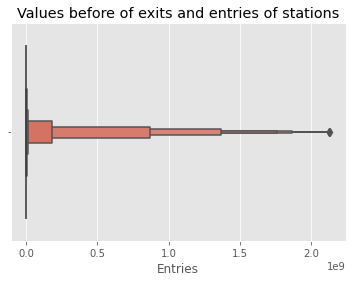

In [273]:
ax = sns.boxenplot(x='EXITS', data=df).set(xlabel='Entries',title="Values before of exits and entries of stations")



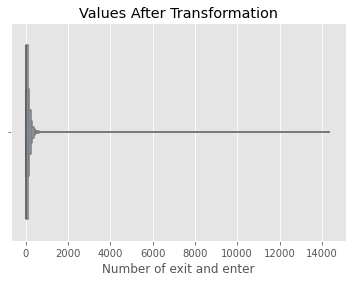

In [277]:
axc = sns.boxenplot(x='ENTRIES_P', data=mta0,palette="pastel").set(xlabel='Number of exit and enter',title="Values After Transformation")

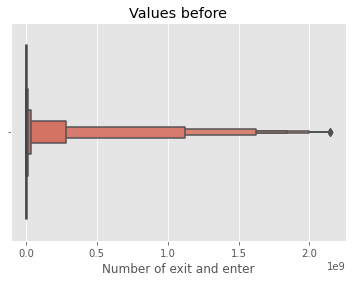

In [284]:


ax = sns.boxenplot(x='ENTRIES', data=df).set(xlabel='Number of exit and enter',title="Values before")


In [12]:
# testing

ax = sns.scatterplot(x="DATE", y="ENTRIES_P", data=df)
plt.xticks("")
plt.show()

NameError: name 'df' is not defined

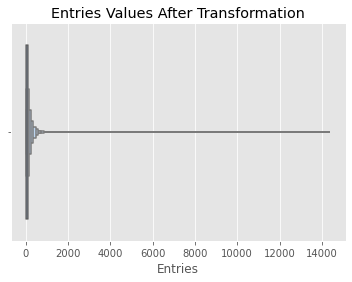

In [267]:
axc = sns.boxenplot(x='EXITS_P', data=mta0,palette="pastel").set(xlabel='Entries',title="Entries Values After Transformation")

In [6]:
#import pandas as pd
  
# readinag given csv file
# and creating dataframe
#dataframe1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_210925.txt")
  
# storing this dataframe in a csv file
#dataframe1.to_csv('G.csv',sep = ',',header = True) #index = None)
                  
#dataframe1.columns =['C/A','unit','SCP','Station','date','time','desc','entries','exits']      

In [ ]:
#dataframe1.reset_index(inplace=True, drop=True)
#dataframe1.dtypes

In [ ]:

#dataframe1.get('EXITS')
#dataframe1.head()
%pwd

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib.ticker import FuncFormatter
matplotlib.style.use('ggplot')
import sqlite3 
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None


#mta = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_210925.txt")
#mta.to_csv('turnstile_210925.csv',index = None)
#mta.columns =['C/A','unit','SCP','Station','date','time','desc','entries','exits']      

In [10]:
df11 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210925.txt')
df22 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210918.txt')
df33 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210911.txt')
df44 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210904.txt')
df55 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210828.txt')
df66 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210821.txt')
df77 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210814.txt')
df88 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210807.txt')
df99 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210731.txt')
df91 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210724.txt')
df81 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210717.txt')
df71 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210710.txt')
dfss = [df11, df22, df33, df44,df55,df66,df77,df88,df99,df91,df81,df71]
merge = partial(pd.merge, on=['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME', 'DESC','ENTRIES','EXITS                                                               '], how='outer')
mta0 = reduce(merge, dfss)



In [11]:
mta0.shape

(2514588, 11)

In [265]:
mta0.head()
df.head()

#mta0.loc[:,['EXITS_P']]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Datetime,Turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455,2021-09-18 00:00:00,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457,2021-09-18 04:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478,2021-09-18 08:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524,2021-09-18 12:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561,2021-09-18 16:00:00,A002-R051-02-00-00


In [175]:
#mta0.to_csv("Last_MTA_Mothns.csv", index = False)

In [5]:

#del mta["DIVISION"]
#mta=mta.drop(['DIVISION'], axis = 1)


In [12]:
mta0.columns = mta0.columns.str.strip()
mta0["ENTRIES"].describe()
mta0.groupby(['DIVISION']).count()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS
DIVISION,,,,,,,,,,
BMT,555420,555420,555420,555420,555420,555420,555420,555420,555420,555420
IND,875806,875806,875806,875806,875806,875806,875806,875806,875806,875806
IRT,906828,906828,906828,906828,906828,906828,906828,906828,906828,906828
PTH,155465,155465,155465,155465,155465,155465,155465,155465,155465,155465
RIT,5053,5053,5053,5053,5053,5053,5053,5053,5053,5053
SRT,16016,16016,16016,16016,16016,16016,16016,16016,16016,16016


In [13]:
mta0['Datetime'] = pd.to_datetime(mta0.DATE + ' ' + mta0.TIME, format='%m/%d/%Y  %H:%M:%S')
mta0['Turnstile'] = mta0['C/A'] + '-' + mta0['UNIT'] + '-' + mta0['SCP']
mta0
#mta11 = mta0[(mta0.datetime >= '09-01-21 00:00:00') & 
#          (mta0.datetime <'09-24-21 00:00:00')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Datetime,Turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455,2021-09-18 00:00:00,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457,2021-09-18 04:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478,2021-09-18 08:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524,2021-09-18 12:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561,2021-09-18 16:00:00,A002-R051-02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514583,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585,2021-07-09 05:00:00,TRAM2-R469-00-05-01
2514584,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585,2021-07-09 09:00:00,TRAM2-R469-00-05-01
2514585,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585,2021-07-09 09:37:06,TRAM2-R469-00-05-01
2514586,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585,2021-07-09 13:00:00,TRAM2-R469-00-05-01


In [15]:
mta0.shape


(2514588, 13)

In [17]:
def dow(mta0):
   
    # Create 'DOW' (Day of Week) column from 'DATETIME'
    
    mta0['DOW'] = mta0['Datetime'].apply(lambda x: datetime.strftime(x, '%A')) # or add datetime.datetime
    # Drop unnecessary columns
    #mta = mta.drop(['LINENAME', 'DIVISION', 'DATE', 'DESC','TIME'], axis=1)
    return mta0



dow(mta0)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Datetime,Turnstile,DOW
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455,2021-09-18 00:00:00,A002-R051-02-00-00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457,2021-09-18 04:00:00,A002-R051-02-00-00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478,2021-09-18 08:00:00,A002-R051-02-00-00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524,2021-09-18 12:00:00,A002-R051-02-00-00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561,2021-09-18 16:00:00,A002-R051-02-00-00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514583,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585,2021-07-09 05:00:00,TRAM2-R469-00-05-01,Friday
2514584,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585,2021-07-09 09:00:00,TRAM2-R469-00-05-01,Friday
2514585,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585,2021-07-09 09:37:06,TRAM2-R469-00-05-01,Friday
2514586,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585,2021-07-09 13:00:00,TRAM2-R469-00-05-01,Friday


In [2]:
print("be shape: ", mta0.shape)
mta0.dropna(how='any', inplace=True)
print("af shape: ", mta0.shape)
mta0.head(n=10)


NameError: name 'mta0' is not defined

In [1]:
mm= mta0.groupby(['STATION'])["ENTRIES"].count()
#mm.reset_index().sort_values("ENTRIES", ascending=False).head(5)
mm

#Remove duplicates
#print("prior shape: ", mm.shape)
#mm.drop_duplicates(subset=["STATION", "datetime",'C/A','UNIT','SCP'], inplace=True)
#print("post shape: ", mm.shape)

#mm = mm.sort_values(['STATION','datetime','C/A', 'UNIT', 'SCP'])
#mm

NameError: name 'mta0' is not defined

In [20]:
mm

STATION
1 AV               12396
103 ST              7568
103 ST-CORONA       4533
104 ST              4540
110 ST              3021
                   ...  
WOODLAWN            2517
WORLD TRADE CTR     9050
WTC-CORTLANDT      17629
YORK ST             1524
ZEREGA AV           3024
Name: ENTRIES, Length: 379, dtype: int64

## 1. Sanity Check

### 1.1 Original data
First we look for potential abnormal entries and exits values. Since entries and exits are cumulative values, quantiles do not mean anything, but there should not be any negative values. We expect entries to be larger than exits in general, because New York subway stations commonly have emergency exits, which do not collect exit records. Exits are only collected when a passenger exit through a turnstile.

In [21]:
mta0

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Datetime,Turnstile,DOW
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455,2021-09-18 00:00:00,A002-R051-02-00-00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457,2021-09-18 04:00:00,A002-R051-02-00-00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478,2021-09-18 08:00:00,A002-R051-02-00-00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524,2021-09-18 12:00:00,A002-R051-02-00-00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561,2021-09-18 16:00:00,A002-R051-02-00-00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514583,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585,2021-07-09 05:00:00,TRAM2-R469-00-05-01,Friday
2514584,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585,2021-07-09 09:00:00,TRAM2-R469-00-05-01,Friday
2514585,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585,2021-07-09 09:37:06,TRAM2-R469-00-05-01,Friday
2514586,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585,2021-07-09 13:00:00,TRAM2-R469-00-05-01,Friday


In [22]:
#mta.columns = mta.columns.str.strip()
print('Descriptions of entries:')
print(mta0['ENTRIES'].describe())
print('')
print('Descriptions of exits:')
print(mta0['EXITS'].describe())
print(mta0['EXITS'].count())

Descriptions of entries:
count    2.514588e+06
mean     4.141971e+07
std      2.179176e+08
min      0.000000e+00
25%      2.199450e+05
50%      1.395646e+06
75%      5.996020e+06
max      2.147405e+09
Name: ENTRIES, dtype: float64

Descriptions of exits:
count    2.514588e+06
mean     3.315016e+07
std      1.915639e+08
min      0.000000e+00
25%      1.031560e+05
50%      8.517270e+05
75%      3.971873e+06
max      2.133797e+09
Name: EXITS, dtype: float64
2514588


In [23]:
print('Descriptions of EXITS:')
#b= mta.rename(columns={"UNIT":"z","SCP":"d","EXITS":"x"})
#print('Number of NaN rows: %d' %len(mta0[mta0['EXITS'].isnull()]))
print('Number of unqiue turnstiles: %d' %len(mta0['Turnstile'].unique()))

Descriptions of EXITS:
Number of unqiue turnstiles: 5025


In [24]:
#mta0.head()
# check is there any missing values
print(mta0.isnull().sum())
# check duplicates
print(len(mta0))
#check which index is unique 
#(mta0['Turnstile'].value_counts()>1).any()

mta0['ENTRIES_P'] = mta0.groupby(['C/A', 'SCP'])['ENTRIES'].diff()
mta0['EXITS_P'] = mta0.groupby(['C/A', 'SCP'])['EXITS'].diff()
mta0.head()

#mta0[(mta0['ENTRIES_P']<0)]
#data = data[(data['col1']>0) & (data['valuecol2']>0) & (data['valuecol3']>0)]


#mta0['ENTRIES_P'].count()

mta0['ENTRIES_P'] = mta0['ENTRIES_P'].clip(lower=0, upper=14400)
mta0['EXITS_P'] = mta0['EXITS_P'].clip(lower=0, upper=14400)


station_totals = mta0.groupby(['STATION', 'LINENAME'])['ENTRIES_P', 'EXITS_P'].sum()
station_totals.reset_index().sort_values(['ENTRIES_P', 'EXITS_P'])

#cc =station_totals[(station_totals['ENTRIES_P']>0)]
#cc

mta0.head()

mta0['EXITS_P'].max()
mta0.shape

mta0['EXITS_P'].isnull().values.any()


C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
Datetime     0
Turnstile    0
DOW          0
dtype: int64
2514588


True

In [25]:
#mta0.to_csv("MTADB.csv", index = False) export

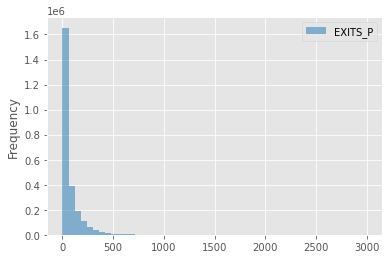

In [26]:
mta0.loc[:,['EXITS_P']].plot.hist(range = (0,3000), bins = (50), color='tab:blue', alpha = 0.5)
plt.show()

In [27]:
# set new column names 'BUSYNESS' to describe the sum of net_entries and net_exits for every turnstiles
mta0['Congestion'] = mta0['ENTRIES_P'] + mta0['EXITS_P']
mta0
#mta0['Congestion'].isnull().sum()
#xxx = mta0['Congestion'].dropna()
#xxx


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Datetime,Turnstile,DOW,ENTRIES_P,EXITS_P,Congestion
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455,2021-09-18 00:00:00,A002-R051-02-00-00,Saturday,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457,2021-09-18 04:00:00,A002-R051-02-00-00,Saturday,10.0,2.0,12.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478,2021-09-18 08:00:00,A002-R051-02-00-00,Saturday,11.0,21.0,32.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524,2021-09-18 12:00:00,A002-R051-02-00-00,Saturday,57.0,46.0,103.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561,2021-09-18 16:00:00,A002-R051-02-00-00,Saturday,132.0,37.0,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514583,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585,2021-07-09 05:00:00,TRAM2-R469-00-05-01,Friday,0.0,0.0,0.0
2514584,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585,2021-07-09 09:00:00,TRAM2-R469-00-05-01,Friday,0.0,0.0,0.0
2514585,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585,2021-07-09 09:37:06,TRAM2-R469-00-05-01,Friday,0.0,0.0,0.0
2514586,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585,2021-07-09 13:00:00,TRAM2-R469-00-05-01,Friday,0.0,0.0,0.0


In [28]:
#mta0.loc[:,['ENTRIES_P']].plot.hist(range = (0,3000), bins = (50), color='tab:red', alpha = 0.5)
#plt.show()
mta0.head()
mta0.dropna(inplace=True)
mta0.head()
mta0['EXITS_P'].isnull().values.any()

False

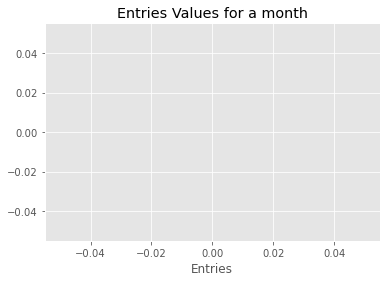

In [102]:
#no missing value
pglo=mta0.isnull().sum()/(len(mta0))*100
ax = sns.scatterplot(x=pglo, data=pglo,palette="pastel").set(xlabel='Entries',title="Entries Values for a month")

In [29]:
# count unique units in every station group and give out the one with most number of units
most_num_unit = mta0.groupby('STATION').UNIT.nunique().sort_values(ascending=False).head()
print(most_num_unit)
mta0.sort_values(by = 'Congestion', ascending = False).head(1)['Turnstile']
mta0.head()

STATION
23 ST              6
86 ST              5
CANAL ST           5
GRD CNTRL-42 ST    4
125 ST             4
Name: UNIT, dtype: int64


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Datetime,Turnstile,DOW,ENTRIES_P,EXITS_P,Congestion
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457,2021-09-18 04:00:00,A002-R051-02-00-00,Saturday,10.0,2.0,12.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478,2021-09-18 08:00:00,A002-R051-02-00-00,Saturday,11.0,21.0,32.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524,2021-09-18 12:00:00,A002-R051-02-00-00,Saturday,57.0,46.0,103.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561,2021-09-18 16:00:00,A002-R051-02-00-00,Saturday,132.0,37.0,169.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,20:00:00,REGULAR,7637377,2613583,2021-09-18 20:00:00,A002-R051-02-00-00,Saturday,141.0,22.0,163.0


In [30]:
# filter dataset to 4am to noon
morning = mta0.set_index(['Datetime'])

#mta0.dtypes
#mta0["TIME"] = pd.to_datetime(temp["TIME"])
morning

xcx= morning

xcx

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Turnstile,DOW,ENTRIES_P,EXITS_P,Congestion
Datetime,,,,,,,,,,,,,,,,
2021-09-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457,A002-R051-02-00-00,Saturday,10.0,2.0,12.0
2021-09-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478,A002-R051-02-00-00,Saturday,11.0,21.0,32.0
2021-09-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524,A002-R051-02-00-00,Saturday,57.0,46.0,103.0
2021-09-18 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561,A002-R051-02-00-00,Saturday,132.0,37.0,169.0
2021-09-18 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,20:00:00,REGULAR,7637377,2613583,A002-R051-02-00-00,Saturday,141.0,22.0,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-09 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585,TRAM2-R469-00-05-01,Friday,0.0,0.0,0.0
2021-07-09 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585,TRAM2-R469-00-05-01,Friday,0.0,0.0,0.0
2021-07-09 09:37:06,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585,TRAM2-R469-00-05-01,Friday,0.0,0.0,0.0


In [31]:
mo = morning.between_time('04:00:00', '12:00:00')
mo.head()

ev = morning.between_time('13:00:00', '17:00:00')
ev.UNIT
ev.index
ev.tail()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Turnstile,DOW,ENTRIES_P,EXITS_P,Congestion
Datetime,,,,,,,,,,,,,,,,
2021-07-07 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/07/2021,13:00:00,REGULAR,5554,585,TRAM2-R469-00-05-01,Wednesday,0.0,0.0,0.0
2021-07-07 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/07/2021,17:00:00,REGULAR,5554,585,TRAM2-R469-00-05-01,Wednesday,0.0,0.0,0.0
2021-07-08 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/08/2021,13:00:00,REGULAR,5554,585,TRAM2-R469-00-05-01,Thursday,0.0,0.0,0.0
2021-07-08 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/08/2021,17:00:00,REGULAR,5554,585,TRAM2-R469-00-05-01,Thursday,0.0,0.0,0.0
2021-07-09 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585,TRAM2-R469-00-05-01,Friday,0.0,0.0,0.0


In [32]:

#xcx["morning"] = xcx.between_time('04:00:00', '12:00:00')
#xcx["evening"] = xcx.between_time('04:00:00', '12:00:00')
#xcx.head()

In [33]:
addmonth = mo.groupby(['STATION', 'DATE']).sum().reset_index()
addmonth['DATE'] = pd.to_datetime(addmonth['DATE'])
addmonth.head()

addmonths = ev.groupby(['STATION', 'DATE']).sum().reset_index()
addmonths['DATE'] = pd.to_datetime(addmonths['DATE'])
addmonths.head()



#xcx = xcx.groupby(['STATION', 'DATE']).sum().reset_index()
#xcx['DATE'] = pd.to_datetime(xcx['DATE'])
#xcx.head()


,STATION,DATE,ENTRIES,EXITS,ENTRIES_P,EXITS_P,Congestion
0,1 AV,2021-07-03,463424378,467939419,1465.0,3042.0,4507.0
1,1 AV,2021-07-04,463429931,467949619,1516.0,2204.0,3720.0
2,1 AV,2021-07-05,463437058,467962271,1361.0,2389.0,3750.0
3,1 AV,2021-07-06,467699981,486756062,1881.0,2631.0,4512.0
4,1 AV,2021-07-07,463450909,467987375,1884.0,2787.0,4671.0


In [34]:
# summing for whole month
morning_month = addmonth.groupby(['STATION'])['Congestion'].sum().reset_index()
morning_month = morning_month.set_index('STATION')

evning_month = addmonths.groupby(['STATION'])['Congestion'].sum().reset_index()
evning_month = evning_month.set_index('STATION')

evning_month.head()

,Congestion
STATION,
1 AV,406021.0
103 ST,880849.0
103 ST-CORONA,337953.0
104 ST,41879.0
110 ST,177617.0


<AxesSubplot:title={'center':'Evening Congestion by Station'}, ylabel='STATION'>

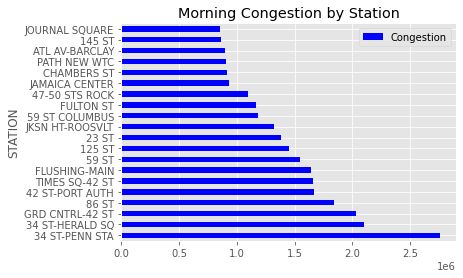

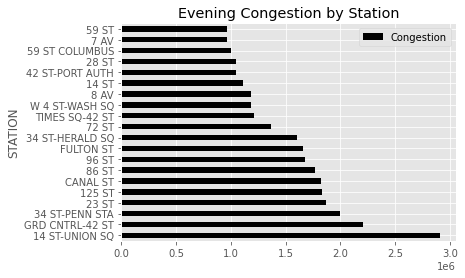

In [38]:
topsts = morning_month.sort_values('Congestion', ascending=False).head(20)
topsts.head()
topsts.plot(kind='barh', title='Morning Congestion by Station' , color="blue")
topst.plot(kind='barh', title='Evening Congestion by Station', color="black")

<AxesSubplot:title={'center':'Evening Congestion by Station'}, ylabel='STATION'>

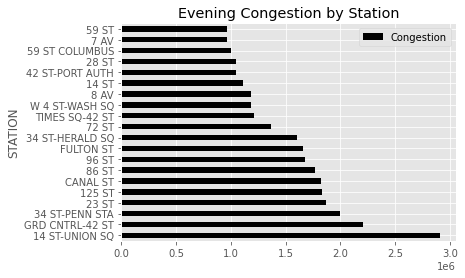

In [36]:
topst = evning_month.sort_values('Congestion', ascending=False).head(20)
topst.head()
topst.plot(kind='barh', title='Evening Congestion by Station', color="black")

In [37]:

print(topsts.describe())
print(topst.describe())

         Congestion
count  2.000000e+01
mean   1.410637e+06
std    5.064415e+05
min    8.540820e+05
25%    9.298992e+05
50%    1.352839e+06
75%    1.664142e+06
max    2.755665e+06
         Congestion
count  2.000000e+01
mean   1.521578e+06
std    5.076669e+05
min    9.625580e+05
25%    1.093432e+06
50%    1.486050e+06
75%    1.825583e+06
max    2.907700e+06


In [51]:
#!pip install plotly
#!pip install cufflinks
import plotly.express as px



# moring

zx= topsts.reset_index()
fig = px.bar(zx ,x="STATION", y='Congestion' ,text='Congestion',title='Morning Congestion By Station of Months Jul,Aug,Sep 2021 (4 AM - 12 PM)' ,pattern_shape_sequence=["."])#, animation_frame="Congestion", animation_group= "STATION" )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()




In [52]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(zx, x="STATION", y="Congestion", color="Congestion", marginal="rug",title='Morning Congestion By Station of Months Jul,Aug,Sep 2021 (4 AM - 12 PM)',
                   hover_data=zx.columns)
fig.show()

In [45]:
import plotly.express as px

fig = px.histogram(zxz, x="Congestion")
fig.show()

In [43]:

## evening
zxz= topst.reset_index()
fig = px.bar(zxz ,x="STATION", y='Congestion' ,text='Congestion',title='Evening Congestion By Station of Months Jul,Aug,Sep 2021 (1 PM - 5 PM)' ,pattern_shape_sequence=[ "x"])#, animation_frame="Congestion", animation_group= "STATION" )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()




In [47]:
import plotly.express as px

fig = px.histogram(zxz, x="STATION", y="Congestion", color="Congestion", marginal="rug",title='Evening Congestion By Station of Months Jul,Aug,Sep 2021 (1 PM - 5 PM)',
                   hover_data=zxz.columns)
fig.show()

In [13]:
#!pip install --upgrade folium

#.   test maps  #.   test maps #.   test maps #.   test maps #.   test maps

import folium

folium_map = folium.Map(location=[24.755562, 46.589584],
                        zoom_start=13,
                        tiles='OpenStreetMap')
#[40.750373,-73.991057]
folium.CircleMarker(location=[24.755562,46.589584],fill=True).add_to(folium_map)
folium_map


In [9]:
St_data = pd.read_csv("d-2.csv")
#bike_data["Start Time"] = pd.to_datetime(bike_data["Start Time"])
#bike_data["Stop Time"] = pd.to_datetime(bike_data["Stop Time"])
#bike_data["hour"] = bike_data["Start Time"].map(lambda x: x.hour)
#St_data.shape()
#locations

In [8]:
St_data

,Line,Station Name,Daytime Routes,Borough Name,Complex Id,Division,Gtfs Stop Id,North Direction Label,South Direction Label,Station Geom,Station Id,Structure,Station Lat,Station Lon
0,Astoria,Astoria - Ditmars Blvd,N W,Queens,1,BMT,R01,NaN,Manhattan,POINT(-73.912034 40.775036),1,Elevated,40.775036,-73.912034
1,Astoria,Astoria Blvd,N W,Queens,2,BMT,R03,Ditmars Blvd,Manhattan,POINT(-73.917843 40.770258),2,Elevated,40.770258,-73.917843
2,Astoria,30 Av,N W,Queens,3,BMT,R04,Astoria - Ditmars Blvd,Manhattan,POINT(-73.921479 40.766779),3,Elevated,40.766779,-73.921479
3,Astoria,Broadway,N W,Queens,4,BMT,R05,Astoria - Ditmars Blvd,Manhattan,POINT(-73.925508 40.76182),4,Elevated,40.761820,-73.925508
4,Astoria,36 Av,N W,Queens,5,BMT,R06,Astoria - Ditmars Blvd,Manhattan,POINT(-73.929575 40.756804),5,Elevated,40.756804,-73.929575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,Staten Island,Prince's Bay,SIR,Staten Island,517,SIR,S15,St George,Tottenville,POINT(-74.200064 40.525507),517,Open Cut,40.525507,-74.200064
492,Staten Island,Pleasant Plains,SIR,Staten Island,518,SIR,S14,St George,Tottenville,POINT(-74.217847 40.52241),518,Embankment,40.522410,-74.217847
493,Staten Island,Richmond Valley,SIR,Staten Island,519,SIR,S13,St George,Tottenville,POINT(-74.229141 40.519631),519,Open Cut,40.519631,-74.229141
494,Staten Island,Tottenville,SIR,Staten Island,522,SIR,S09,St George,NaN,POINT(-74.251961 40.512764),522,At Grade,40.512764,-74.251961


In [43]:
locations = St_data.groupby(["Station Name"])["Station Lat","Station Lon"].first()

station_locations = St_data[["Station Lat", "Station Lon", "Station Name"]]
station_locations.reset_index(drop=True)
station_locations

#highesr[highesr['Station Name'] == 'Astoria Blvd']

#highesr["Station Name"].unique()

,Station Lat,Station Lon,Station Name
0,40.775036,-73.912034,Astoria - Ditmars Blvd
1,40.770258,-73.917843,Astoria Blvd
2,40.766779,-73.921479,30 Av
3,40.761820,-73.925508,Broadway
4,40.756804,-73.929575,36 Av
...,...,...,...
491,40.525507,-74.200064,Prince's Bay
492,40.522410,-74.217847,Pleasant Plains
493,40.519631,-74.229141,Richmond Valley
494,40.512764,-74.251961,Tottenville


In [44]:
#mask = ((station_locations["Station Lat"] == 40.750373 & station_locations["Station Lon"] == -73.991057) &
#(station_locations["Station Lat"]== 40.749567 & station_locations["Station Lon"] == -73.98795))

#station_locations[mask].head()
#grdce = station_locations[station_locations['Station Lat'] == 40.750373]
#grdce = station_locations[station_locations['Station Lat'] == 40.749567]                        
grdce= station_locations[(station_locations['Station Lat'] == 40.785868) &
                         (station_locations['Station Lon'] == -73.968916)]

#grdce

vb= station_locations[station_locations["Station Name"].isin(["34 St - Herald Sq", "Times Sq - 42 St", 
                                                              "14 St - Union Sq","Grand Central - 42 St","Union Sq - 14 St","34 St - Penn Station"])]
#vb
#vb[10]['Station Name'] = "Times Sq - 42" 

vb.loc[10, "Station Name"] =  "Times Sq - 42"
vb

,Station Lat,Station Lon,Station Name
10,40.754672,-73.986754,Times Sq - 42
11,40.749567,-73.987950,34 St - Herald Sq
14,40.735736,-73.990568,14 St - Union Sq
116,40.734789,-73.990730,Union Sq - 14 St
163,40.752287,-73.993391,34 St - Penn Station
227,40.749719,-73.987823,34 St - Herald Sq
317,40.755290,-73.987495,Times Sq - 42 St
318,40.750373,-73.991057,34 St - Penn Station
402,40.751776,-73.976848,Grand Central - 42 St
406,40.734673,-73.989951,14 St - Union Sq


In [45]:

#3La=[]
#Lo=[]
#for each in highesr[:1000].iterrows():        
 #   if(each[1]['Station Name'] == "86 St" and each[1]['Station Lat']== 40.785868): 
  #      print(each)
   #            #Lo+=each['Station Lon']

                
#df_quarterly_sales[6]['units'] = 120 
#highesr

In [46]:
#"CartoDB dark_matter" OpenStreetMap
map_1 = folium.Map(location=[40.767937,-73.982155 ],tiles='OpenStreetMap',
 zoom_start=12) 
for each in station_locations[:1000].iterrows():
    
    folium.CircleMarker([each[1]['Station Lat'],each[1]['Station Lon']],
                        radius=7,
                        color='red',
                        popup=str(each[1]['Station Lat'])+','+str(each[1]['Station Lon'])+','+str(each[1]['Station Name'])  ,
                        fill_color='#FD8A6C'
                        ).add_to(map_1)
map_1

In [47]:
#"CartoDB dark_matter" OpenStreetMap
map_1 = folium.Map(location=[40.767937,-73.982155 ],tiles='CartoDB dark_matter',
 zoom_start=12) 
for each in vb[:1000].iterrows():
       # generate the popup message that is shown on click.
       # popup_text = "{}<br> total departures: {}<br> total arrivals: {}<br> net departures: {}"
        #popup_text = popup_text.format(row["Start Station Name"],
                         # row["Arrival Count"],
                         # row["Departure Count"],
                         # net_departures)
    folium.CircleMarker([each[1]['Station Lat'],each[1]['Station Lon']],
                        radius=10,
                        color='red',
                        popup=str(each[1]['Station Lat'])+','+str(each[1]['Station Lon'])+','+str(each[1]['Station Name']),
                        fill_color='#FD8A6C'
                        ).add_to(map_1)
map_1

In [40]:
# set net entries and net exits which <0 to nan.
#mmm = mta0.loc[mta0['ENTRIES_P'] < 0, ['ENTRIES_P']] = np.nan
#mmm = mta0.loc[mta0['EXITS_P'] < 0, ['EXITS_P']] = np.nan
#mmm
#mmm = mta0.groupby(['STATION', 'LINENAME'])['ENTRIES_P', 'EXITS_P'].sum()
#mmm

#mta0.to_csv('MTA_Turnstile_2021_raw.csv', index = False)

# limit to Grand Central at turnstile level
grdcentral = mta0[mta0['STATION'] == '34 ST-HERALD SQ']
vcb= mta0.STATION.unique()
#len(vcb)


### 1.2 Use differenced data instead

Then we calculate the differences between every two collection timestamps and look for abnormal entries/exits per time interval. NaN values are generated for the very first data record for each unique turnstile during differencing.

In [ ]:
# group data by turnstile, sort each turnstile by datetime
# Create new columns en_diff and ex_diff for each unique turnstile
# turn cumulative counts into counts per interval

mta_sorted = mta.sort_values(['turnstile', 'datetime'])
mta_sorted = mta_sorted.reset_index(drop = True)

turnstile_grouped = mta_sorted.groupby(['turnstile'])

mta_sorted['entries_diff'] = turnstile_grouped['entries'].transform(pd.Series.diff)
mta_sorted['exits_diff'] = turnstile_grouped['exits'].transform(pd.Series.diff)

mta_sorted.head()

In [ ]:
#del mta

Sanity check of *entries_diff* and *exits_diff*; number of observations with NaN should equal the number of unique turnstiles. *entries_diff* and *exits_diff* should always be positive since cumulative values are supposed to increase or at least stay even.